# Plot roc results of different feature dimensions

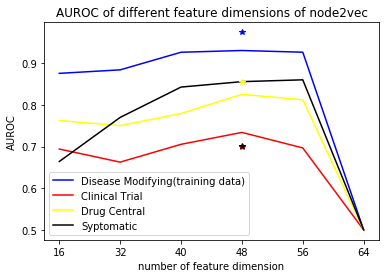

In [14]:
import json
import matplotlib.pyplot as plt
def read_file(path):
    with open(path,'r') as file:
        validation_dict = json.load(file)
    return validation_dict
def plot(path_list,evaluation_method):
    dm_roc=[]
    ct_roc=[]
    dc_roc=[]
    sy_roc=[]
    for path in path_list:
        validation_dict=read_file(path)
        dm_roc.append(validation_dict['Disease Modifying']['ROC'])
        ct_roc.append(validation_dict['Clinical Trial']['ROC'])
        dc_roc.append(validation_dict['Drug Central']['ROC'])
        sy_roc.append(validation_dict['Syptomatic']['ROC'])
    # different feature dimensions
    x=['16','32','40','48','56','64']
    #Disease Modifying is training data
    plt.plot(x,dm_roc,color='blue',label='Disease Modifying(training data)')
    plt.plot(x,ct_roc,color='red',label='Clinical Trial')
    plt.plot(x,dc_roc,color='yellow',label='Drug Central')
    plt.plot(x,sy_roc,color='black',label='Syptomatic')
    # Himmelstein's roc, plot as same color with the same dataset.compare them with the best result-dimension 48
    plt.plot(['48'],[0.974],color='blue',marker="*")
    plt.plot(['48'],[0.7],color='red',marker="*")
    plt.plot(['48'],[0.855],color='yellow',marker="*")
    plt.plot(['48'],[0.702],color='black',marker="*")
    plt.xlabel('number of feature dimension')
    plt.ylabel('AUROC')
    plt.title(label='AUROC of different feature dimensions of node2vec')
    plt.legend()
    return plt.show()
plot(['/home/lxu/Desktop/validation_d16.json','/home/lxu/Desktop/validation_d32.json','/home/lxu/Desktop/validation_d40.json','/home/lxu/Desktop/validation_d48.json','/home/lxu/Desktop/validation_d56.json','/home/lxu/Desktop/validation_d64.json'],'roc')

# Make a matrix of all results

In [10]:
import os
import pandas as pd
import json
output_directory = '/home/lxu/Desktop/results'
df = pd.DataFrame(0.000,index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],columns =['walk_length','dimensions','number_walk','window size','p','q','Disease Modifying roc','Clinical Trial roc','Drug Central roc','Symptomatic roc'])
i=1
for filename in os.listdir(output_directory):
    
    if 'node2vec_graph' in filename:
        directory = os.path.join(output_directory,filename)
        metadata_path= os.path.join(directory,'config.json')
        validation_path = os.path.join(directory,'validation.json')
        df['p'][i]=1
        df['q'][i]=1
        with open (metadata_path,'r') as file:
            metadata = json.load(file)
            df['walk_length'][i] = metadata['walk_length']
            df['number_walk'][i] = metadata['num_walks']
            df['dimensions'][i] = metadata['dimensions']
            df['window size'][i] = metadata['window']
        with open (validation_path,'r') as file:
            validation = json.load(file)
            df['Disease Modifying roc'][i] = validation['Disease Modifying']['ROC']
            df['Clinical Trial roc'][i] = validation['Clinical Trial']['ROC']
            df['Drug Central roc'][i] = validation['Drug Central']['ROC']
            df['Symptomatic roc'][i] = validation['Symptomatic']['ROC']
    i+=1
df.style
print(df)   

    walk_length  dimensions  number_walk  window size    p    q  \
1          30.0        56.0         10.0         10.0  1.0  1.0   
2          50.0        48.0         10.0         10.0  1.0  1.0   
3          30.0        48.0         10.0          2.0  1.0  1.0   
4          30.0        48.0         10.0          4.0  1.0  1.0   
5          30.0        16.0         10.0         10.0  1.0  1.0   
6          30.0        32.0         10.0         10.0  1.0  1.0   
7          20.0        48.0         10.0         10.0  1.0  1.0   
8          30.0        40.0         10.0         10.0  1.0  1.0   
9          10.0        48.0         10.0         10.0  1.0  1.0   
10         80.0        48.0         10.0         10.0  1.0  1.0   
11         30.0        64.0         10.0         10.0  1.0  1.0   
12         30.0       159.0         10.0         10.0  1.0  1.0   
13         30.0        48.0         10.0         10.0  1.0  1.0   
14          0.0         0.0          0.0          0.0  0.0  0.

In [2]:
import pandas as pd
dff= pd.read_csv("all results",sep='\t')
dff.drop

,Unnamed: 0,walk_length,dimensions,number_walk,window size,p,q,Disease Modifying roc,Clinical Trial roc,Drug Central roc,Symptomatic roc
0,1,30.0,56.0,10.0,10.0,1.0,1.0,0.926117,0.696589,0.812160,0.859918
1,2,50.0,48.0,10.0,10.0,1.0,1.0,0.934100,0.749218,0.803665,0.843703
2,3,30.0,48.0,10.0,2.0,1.0,1.0,0.938511,0.702795,0.845893,0.872022
3,4,30.0,48.0,10.0,4.0,1.0,1.0,0.899846,0.744448,0.721881,0.807746
4,5,30.0,16.0,10.0,10.0,1.0,1.0,0.875425,0.693925,0.762244,0.664056
5,6,30.0,32.0,10.0,10.0,1.0,1.0,0.883812,0.662567,0.749998,0.769785
6,7,20.0,48.0,10.0,10.0,1.0,1.0,0.923265,0.736966,0.826057,0.754967
7,8,30.0,40.0,10.0,10.0,1.0,1.0,0.926042,0.705247,0.779129,0.842538
8,9,10.0,48.0,10.0,10.0,1.0,1.0,0.500000,0.500000,0.500000,0.500000
9,10,80.0,48.0,10.0,10.0,1.0,1.0,0.941727,0.708820,0.824748,0.857423


In [26]:

dff=dff.sort_values('walk_length')
#dff.drop([13,14,15])
dff

,Unnamed: 0,walk_length,dimensions,number_walk,window size,p,q,Disease Modifying roc,Clinical Trial roc,Drug Central roc,Symptomatic roc
13,14,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
14,15,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
15,16,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8,9,10.0,48.0,10.0,10.0,1.0,1.0,0.500000,0.500000,0.500000,0.500000
6,7,20.0,48.0,10.0,10.0,1.0,1.0,0.923265,0.736966,0.826057,0.754967
0,1,30.0,56.0,10.0,10.0,1.0,1.0,0.926117,0.696589,0.812160,0.859918
2,3,30.0,48.0,10.0,2.0,1.0,1.0,0.938511,0.702795,0.845893,0.872022
3,4,30.0,48.0,10.0,4.0,1.0,1.0,0.899846,0.744448,0.721881,0.807746
4,5,30.0,16.0,10.0,10.0,1.0,1.0,0.875425,0.693925,0.762244,0.664056
5,6,30.0,32.0,10.0,10.0,1.0,1.0,0.883812,0.662567,0.749998,0.769785


[10.0, 20.0, 30.0, 50.0, 80.0]


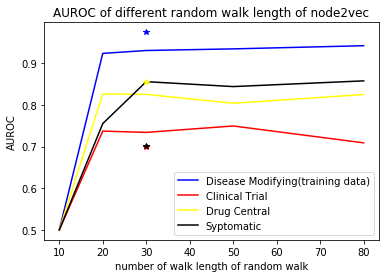

In [29]:
import matplotlib.pyplot as plt
import numpy as np
walk_length =[]
dm_roc=[]
ct_roc=[]
dc_roc=[]
sy_roc=[]
for _,row in dff.iterrows():
    if row['dimensions'] == 48 and row['number_walk'] ==10 and row['window size']==10:
        walk_length.append(row['walk_length'])
        dm_roc.append(row['Disease Modifying roc'])
        ct_roc.append(row['Clinical Trial roc'])
        dc_roc.append(row['Drug Central roc'])
        sy_roc.append(row['Symptomatic roc'])
x=walk_length
print(x)
sy_roc=np.array(sy_roc)

plt.plot(x,dm_roc,color='blue',label='Disease Modifying(training data)')
plt.plot(x,ct_roc,color='red',label='Clinical Trial')
plt.plot(x,dc_roc,color='yellow',label='Drug Central')
plt.plot(x,sy_roc,color='black',label='Syptomatic')
plt.plot([30],[0.974],color='blue',marker="*")
plt.plot([30],[0.7],color='red',marker="*")
plt.plot([30],[0.855],color='yellow',marker="*")
plt.plot([30],[0.702],color='black',marker="*")
plt.xlabel('number of walk length of random walk')
plt.ylabel('AUROC')
plt.title(label='AUROC of different random walk length of node2vec')
plt.legend()
plt.show()

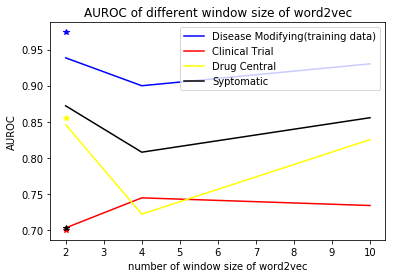

In [32]:
import matplotlib.pyplot as plt
import numpy as np
window_size =[]
dm_roc=[]
ct_roc=[]
dc_roc=[]
sy_roc=[]
for _,row in dff.iterrows():
    if row['dimensions'] == 48 and row['walk_length'] ==30 and row['number_walk']==10:
        window_size.append(row['window size'])
        dm_roc.append(row['Disease Modifying roc'])
        ct_roc.append(row['Clinical Trial roc'])
        dc_roc.append(row['Drug Central roc'])
        sy_roc.append(row['Symptomatic roc'])
x=window_size
plt.plot(x,dm_roc,color='blue',label='Disease Modifying(training data)')
plt.plot(x,ct_roc,color='red',label='Clinical Trial')
plt.plot(x,dc_roc,color='yellow',label='Drug Central')
plt.plot(x,sy_roc,color='black',label='Syptomatic')
plt.plot([2],[0.974],color='blue',marker="*")
plt.plot([2],[0.7],color='red',marker="*")
plt.plot([2],[0.855],color='yellow',marker="*")
plt.plot([2],[0.702],color='black',marker="*")
plt.xlabel('number of window size of word2vec')
plt.ylabel('AUROC')
plt.title(label='AUROC of different window size of word2vec')
plt.legend()
plt.show()